In [8]:
import pandas as pd
import numpy as np
import re
import string


C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
import spacy
import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
article_data = pd.read_csv('cnn.csv')

In [3]:
def clean_text(text):
    delete_dict = {sp_character:'' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:' +text1)
    textArr = text1.split()
    text2 = ' '.join([w for w in textArr if (not w.isdigit() and (not w.isdigit() and len(w)>3))])
    
    return text2.lower()

In [4]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
article_data.dropna(axis = 0, how = 'any', inplace = True)

In [6]:
article_data['body'] = article_data['body'].apply(clean_text)
article_data['Num_words_content'] = article_data['body'].apply(lambda x:len(str(x).split()))

print('------dataset------')
print(len(article_data))
print('-------------------')


KeyError: 'body'

In [15]:
max_article_data_sentence_length = article_data['Num_words_content'].max()
mask = (article_data['Num_words_content'] < 150) & (article_data['Num_words_content'] >= 20)
df_short_articles = article_data[mask]
df_sampled = df_short_articles.groupby('body').apply(lambda x: x.sample(n=1).reset_index(drop = True))

print('No. of Short articles')
print(len(df_short_articles))

No. of Short articles
29466


In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text
df_sampled['body']=df_sampled['body'].apply(remove_stopwords)

In [19]:
spacy.prefer_gpu()
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(contents,allowed_postags=['NOUN', 'ADJ']):
    output = []
    for sent in contents:
        doc = nlp(sent)
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

In [20]:
content_list=df_sampled['body'].tolist()
print(content_list[1])
tokenized_content = lemmatization(content_list)
print(tokenized_content[1])

104yearold recovers coronavirus time birthday 104yearold wwii veteran oregon survived spanish great depression world recovered coronavirus time celebrate birthday social distancing party
['coronavirus', 'time', 'birthday', 'veteran', 'spanish', 'depression', 'world', 'coronavirus', 'time', 'birthday', 'social', 'party']


In [21]:
dictionary = corpora.Dictionary(tokenized_content)
doc_term_matrix = [dictionary.doc2bow(cont) for cont in tokenized_content]

In [14]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=18, random_state=100, chunksize=20000, passes=50, iterations=100)
lda_model.print_topics()


[(0,
  '0.015*"coronavirus" + 0.015*"trump" + 0.015*"debate" + 0.015*"guitar" + 0.011*"queen" + 0.011*"dorgi" + 0.011*"election" + 0.011*"white" + 0.008*"covid19" + 0.008*"month"'),
 (1,
  '0.036*"green" + 0.027*"voice" + 0.018*"season" + 0.018*"good" + 0.018*"celebrity" + 0.018*"friend" + 0.009*"pandemic" + 0.009*"full" + 0.009*"coronavirus" + 0.009*"year"'),
 (2,
  '0.001*"world" + 0.001*"second" + 0.001*"record" + 0.001*"minute" + 0.001*"half" + 0.001*"marathon" + 0.001*"gold" + 0.001*"championship" + 0.001*"athletic" + 0.001*"take"'),
 (3,
  '0.040*"bitcoin" + 0.023*"investor" + 0.023*"year" + 0.012*"week" + 0.012*"coronavirus" + 0.012*"symbolic" + 0.012*"morning" + 0.012*"early" + 0.012*"shark" + 0.012*"pandemic"'),
 (4,
  '0.045*"second" + 0.028*"pandemic" + 0.028*"race" + 0.024*"place" + 0.024*"world" + 0.020*"record" + 0.020*"last" + 0.016*"coronavirus" + 0.016*"half" + 0.012*"people"'),
 (5,
  '0.029*"trump" + 0.019*"coronavirus" + 0.017*"store" + 0.015*"president" + 0.015*"ca

In [22]:
LDA = gensim.models.ldamodel.LdaModel

In [17]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=1499))

from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_content, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


Perplexity:  -5.618801180045045

Coherence Score: 0.44913290527352157


In [25]:
from gensim.models.coherencemodel import CoherenceModel

In [26]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_content, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

NameError: name 'lda_model' is not defined

In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [28]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_content, start=2, limit=20, step=1)

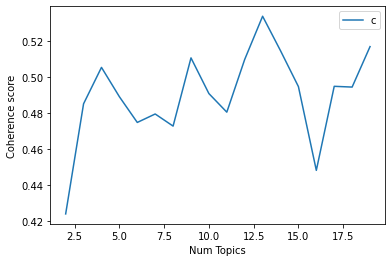

In [29]:
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [30]:
for m, cv in zip(x, coherence_values):
    print("NUm Topics =", m, " has Coherence Value of", round(cv, 4))

NUm Topics = 2  has Coherence Value of 0.4239
NUm Topics = 3  has Coherence Value of 0.4852
NUm Topics = 4  has Coherence Value of 0.5055
NUm Topics = 5  has Coherence Value of 0.4891
NUm Topics = 6  has Coherence Value of 0.4748
NUm Topics = 7  has Coherence Value of 0.4795
NUm Topics = 8  has Coherence Value of 0.4728
NUm Topics = 9  has Coherence Value of 0.5107
NUm Topics = 10  has Coherence Value of 0.4909
NUm Topics = 11  has Coherence Value of 0.4805
NUm Topics = 12  has Coherence Value of 0.5099
NUm Topics = 13  has Coherence Value of 0.5339
NUm Topics = 14  has Coherence Value of 0.5147
NUm Topics = 15  has Coherence Value of 0.4948
NUm Topics = 16  has Coherence Value of 0.4481
NUm Topics = 17  has Coherence Value of 0.4949
NUm Topics = 18  has Coherence Value of 0.4945
NUm Topics = 19  has Coherence Value of 0.517


In [33]:
optimal_model = model_list[11]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=30)

[(0,
  '0.026*"business" + 0.023*"coronavirus" + 0.016*"pandemic" + 0.015*"week" + 0.014*"worker" + 0.013*"economic" + 0.012*"bank" + 0.011*"company" + 0.010*"covid19" + 0.010*"small" + 0.009*"unemployment" + 0.009*"crisis" + 0.009*"loan" + 0.008*"economy" + 0.008*"service" + 0.008*"financial" + 0.007*"job" + 0.007*"cash" + 0.006*"industry" + 0.006*"package" + 0.006*"support" + 0.006*"program" + 0.006*"payment" + 0.006*"benefit" + 0.006*"dollar" + 0.006*"sector" + 0.006*"claim" + 0.006*"government" + 0.006*"credit" + 0.005*"customer"'),
 (1,
  '0.027*"coronavirus" + 0.020*"market" + 0.016*"pandemic" + 0.015*"price" + 0.015*"year" + 0.015*"flight" + 0.014*"stock" + 0.014*"percent" + 0.012*"global" + 0.012*"week" + 0.012*"last" + 0.010*"point" + 0.010*"economy" + 0.010*"month" + 0.009*"sale" + 0.008*"demand" + 0.008*"quarter" + 0.008*"airline" + 0.007*"industry" + 0.007*"world" + 0.007*"economic" + 0.007*"country" + 0.007*"international" + 0.007*"index" + 0.006*"outbreak" + 0.006*"low" +

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

c:\users\hp\miniconda3\envs\nlp_env\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.170028  0.049391       1        1  17.865070
3      0.050276 -0.051481       2        1  13.822150
8      0.165400  0.082324       3        1  12.935899
12     0.240890 -0.012391       4        1   6.653636
0     -0.143984  0.146266       5        1   6.619093
1     -0.133886  0.054305       6        1   6.561448
7     -0.052320 -0.233197       7        1   6.227196
2      0.011285  0.155990       8        1   6.132429
10    -0.146238  0.027105       9        1   5.950456
5     -0.138477 -0.013720      10        1   5.942012
6     -0.087306  0.059220      11        1   5.216400
9     -0.042772 -0.222973      12        1   4.113939
11     0.107105 -0.040840      13        1   1.960272, topic_info=         Term          Freq         Total Category  logprob  loglift
27   positive   7834.000000   7834.000000  Default  30.0000  30.0000
2        case  15708.000000  15708.000000  Default  29.0000  29.0000
506    police   4215.000000   4215.000000  Default  28.0000  28.0000
6       death   7396.000000   7396.000000  Default  27.0000  27.0000
16   hospital   6655.000000   6655.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
288   comment    147.515441   1788.628840  Topic13  -5.0201   1.4368
71    officer    147.288119   2052.833117  Topic13  -5.0216   1.2975
72   official    147.081477   5653.226662  Topic13  -5.0230   0.2831
39       year    139.532429   4958.061328  Topic13  -5.0757   0.3616
4     covid19    139.933825  20405.003264  Topic13  -5.0729  -1.0503

[1052 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1380     10  0.967089      03rd
7346      1  0.973884  abortion
4751      7  0.989851     abuse
4277      1  0.008896  academic
4277      9  0.978612  academic
...     ...       ...       ...
3094      3  0.010121      yoga
3094     10  0.020241      yoga
1359      3  0.006720   youtube
1359      7  0.987781   youtube
4140      6  0.986044        ’s

[4351 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 9, 13, 1, 2, 8, 3, 11, 6, 7, 10, 12])

In [1]:
type(optimal_model.print_topics)

NameError: name 'optimal_model' is not defined

In [2]:
key_concepts = '''
[(0,
  '0.026*"business" + 0.023*"coronavirus" + 0.016*"pandemic" + 0.015*"week" + 0.014*"worker" + 0.013*"economic" + 0.012*"bank" + 0.011*"company" + 0.010*"covid19" + 0.010*"small" + 0.009*"unemployment" + 0.009*"crisis" + 0.009*"loan" + 0.008*"economy" + 0.008*"service" + 0.008*"financial" + 0.007*"job" + 0.007*"cash" + 0.006*"industry" + 0.006*"package" + 0.006*"support" + 0.006*"program" + 0.006*"payment" + 0.006*"benefit" + 0.006*"dollar" + 0.006*"sector" + 0.006*"claim" + 0.006*"government" + 0.006*"credit" + 0.005*"customer"'),
 (1,
  '0.027*"coronavirus" + 0.020*"market" + 0.016*"pandemic" + 0.015*"price" + 0.015*"year" + 0.015*"flight" + 0.014*"stock" + 0.014*"percent" + 0.012*"global" + 0.012*"week" + 0.012*"last" + 0.010*"point" + 0.010*"economy" + 0.010*"month" + 0.009*"sale" + 0.008*"demand" + 0.008*"quarter" + 0.008*"airline" + 0.007*"industry" + 0.007*"world" + 0.007*"economic" + 0.007*"country" + 0.007*"international" + 0.007*"index" + 0.006*"outbreak" + 0.006*"low" + 0.006*"growth" + 0.006*"company" + 0.006*"high" + 0.006*"covid19"'),
 (2,
  '0.036*"government" + 0.023*"fund" + 0.022*"state" + 0.019*"mask" + 0.016*"relief" + 0.016*"covid19" + 0.013*"minister" + 0.012*"coronavirus" + 0.012*"chief" + 0.011*"crore" + 0.011*"emergency" + 0.011*"lakh" + 0.010*"lockdown" + 0.009*"situation" + 0.008*"assistance" + 0.008*"country" + 0.007*"letter" + 0.007*"salary" + 0.007*"people" + 0.006*"support" + 0.006*"month" + 0.006*"fight" + 0.006*"food" + 0.006*"measure" + 0.006*"bank" + 0.006*"poor" + 0.005*"supply" + 0.005*"statement" + 0.005*"national" + 0.005*"donation"'),
 (3,
  '0.034*"people" + 0.030*"coronavirus" + 0.020*"social" + 0.015*"video" + 0.014*"home" + 0.013*"lockdown" + 0.012*"time" + 0.011*"country" + 0.010*"distancing" + 0.010*"covid19" + 0.010*"pandemic" + 0.008*"virus" + 0.007*"medium" + 0.007*"life" + 0.007*"many" + 0.006*"government" + 0.006*"world" + 0.006*"measure" + 0.005*"light" + 0.005*"public" + 0.005*"week" + 0.005*"message" + 0.005*"news" + 0.005*"family" + 0.005*"today" + 0.004*"spread" + 0.004*"nation" + 0.004*"order" + 0.004*"leader" + 0.004*"day"'),
 (4,
  '0.061*"case" + 0.044*"coronavirus" + 0.038*"covid19" + 0.034*"death" + 0.030*"number" + 0.027*"people" + 0.021*"health" + 0.019*"total" + 0.019*"hospital" + 0.019*"patient" + 0.016*"state" + 0.015*"country" + 0.011*"medical" + 0.011*"virus" + 0.011*"positive" + 0.010*"infection" + 0.009*"official" + 0.009*"toll" + 0.008*"care" + 0.008*"disease" + 0.007*"ventilator" + 0.007*"week" + 0.006*"government" + 0.006*"test" + 0.006*"pandemic" + 0.006*"hour" + 0.005*"doctor" + 0.005*"novel" + 0.005*"day" + 0.005*"testing"'),
 (5,
  '0.037*"company" + 0.019*"pandemic" + 0.016*"production" + 0.014*"covid19" + 0.014*"coronavirus" + 0.011*"news" + 0.010*"global" + 0.008*"drug" + 0.007*"world" + 0.007*"month" + 0.006*"executive" + 0.006*"time" + 0.006*"hand" + 0.005*"trial" + 0.005*"canadian" + 0.005*"operation" + 0.005*"vaccine" + 0.005*"network" + 0.005*"product" + 0.004*"week" + 0.004*"year" + 0.004*"work" + 0.004*"plant" + 0.004*"supply" + 0.004*"contract" + 0.004*"release" + 0.004*"response" + 0.004*"employee" + 0.004*"factory" + 0.004*"study"'),
 (6,
  '0.031*"employee" + 0.026*"coronavirus" + 0.025*"store" + 0.014*"pandemic" + 0.012*"order" + 0.011*"business" + 0.010*"bill" + 0.009*"restaurant" + 0.008*"president" + 0.008*"customer" + 0.008*"week" + 0.008*"month" + 0.007*"prison" + 0.006*"company" + 0.006*"park" + 0.006*"staff" + 0.006*"grocery" + 0.006*"government" + 0.006*"worker" + 0.006*"covid19" + 0.005*"many" + 0.005*"time" + 0.005*"work" + 0.005*"inmate" + 0.005*"response" + 0.004*"email" + 0.004*"open" + 0.004*"retailer" + 0.004*"service" + 0.004*"federal"'),
 (7,
  '0.027*"coronavirus" + 0.021*"season" + 0.020*"player" + 0.016*"sport" + 0.016*"pandemic" + 0.016*"game" + 0.014*"team" + 0.014*"club" + 0.014*"world" + 0.012*"league" + 0.011*"time" + 0.011*"football" + 0.011*"event" + 0.009*"first" + 0.009*"week" + 0.009*"fan" + 0.009*"last" + 0.008*"year" + 0.008*"championship" + 0.008*"tournament" + 0.007*"covid19" + 0.006*"crisis" + 0.006*"show" + 0.006*"match" + 0.006*"daily" + 0.006*"place" + 0.005*"coach" + 0.005*"competition" + 0.005*"tour" + 0.005*"series"'),
 (8,
  '0.021*"people" + 0.020*"police" + 0.020*"coronavirus" + 0.019*"covid19" + 0.014*"government" + 0.014*"lockdown" + 0.013*"state" + 0.013*"official" + 0.012*"worker" + 0.012*"district" + 0.011*"health" + 0.010*"area" + 0.009*"quarantine" + 0.008*"city" + 0.008*"public" + 0.008*"officer" + 0.008*"food" + 0.007*"service" + 0.007*"community" + 0.007*"case" + 0.007*"home" + 0.007*"local" + 0.006*"medical" + 0.006*"order" + 0.006*"resident" + 0.006*"person" + 0.006*"member" + 0.005*"authority" + 0.005*"measure" + 0.005*"essential"'),
 (9,
  '0.020*"coronavirus" + 0.019*"time" + 0.019*"good" + 0.016*"year" + 0.012*"pandemic" + 0.010*"news" + 0.008*"late" + 0.007*"date" + 0.007*"schedule" + 0.007*"story" + 0.007*"event" + 0.007*"region" + 0.007*"picture" + 0.006*"open" + 0.006*"world" + 0.006*"video" + 0.006*"thing" + 0.006*"film" + 0.006*"music" + 0.006*"moment" + 0.005*"covid19" + 0.005*"birthday" + 0.005*"week" + 0.005*"right" + 0.005*"online" + 0.005*"actor" + 0.005*"japanese" + 0.005*"singer" + 0.005*"love" + 0.005*"album"'),
 (10,
  '0.019*"year" + 0.017*"coronavirus" + 0.017*"pandemic" + 0.017*"student" + 0.015*"school" + 0.011*"meeting" + 0.010*"financial" + 0.010*"covid19" + 0.009*"decision" + 0.009*"government" + 0.009*"statement" + 0.008*"class" + 0.008*"crisis" + 0.007*"plan" + 0.007*"board" + 0.007*"share" + 0.006*"staff" + 0.006*"month" + 0.006*"company" + 0.006*"dividend" + 0.006*"online" + 0.006*"time" + 0.006*"current" + 0.006*"group" + 0.006*"situation" + 0.005*"last" + 0.005*"member" + 0.005*"conference" + 0.004*"university" + 0.004*"executive"'),
 (11,
  '0.048*"police" + 0.017*"section" + 0.017*"jail" + 0.015*"court" + 0.014*"attack" + 0.014*"coronavirus" + 0.014*"incident" + 0.014*"information" + 0.013*"woman" + 0.011*"prisoner" + 0.010*"tiger" + 0.010*"criminal" + 0.008*"branch" + 0.008*"crime" + 0.008*"charge" + 0.008*"victim" + 0.007*"security" + 0.007*"group" + 0.007*"force" + 0.007*"bail" + 0.007*"thought" + 0.007*"investigation" + 0.007*"comment" + 0.007*"indian" + 0.007*"officer" + 0.007*"official" + 0.006*"sanction" + 0.006*"covid19" + 0.006*"year" + 0.006*"troop"'),
 (12,
  '0.068*"positive" + 0.041*"covid19" + 0.029*"coronavirus" + 0.029*"hospital" + 0.023*"patient" + 0.023*"case" + 0.020*"symptom" + 0.018*"person" + 0.014*"family" + 0.013*"isolation" + 0.013*"official" + 0.012*"test" + 0.012*"ship" + 0.012*"contact" + 0.010*"district" + 0.010*"negative" + 0.009*"quarantine" + 0.009*"people" + 0.009*"health" + 0.009*"sample" + 0.009*"member" + 0.008*"state" + 0.008*"virus" + 0.007*"treatment" + 0.007*"doctor" + 0.007*"woman" + 0.007*"ward" + 0.006*"day" + 0.006*"news" + 0.006*"facility"')]
  '''

In [3]:
import re

In [4]:
pattern = re.compile(r'"(\w+)"')
matches = pattern.finditer(key_concepts)
key_concepts = []
for match in matches:
    key_concepts.append(match.group(1))
type(match.group(1))

str

In [5]:
key_concepts

['business',
 'coronavirus',
 'pandemic',
 'week',
 'worker',
 'economic',
 'bank',
 'company',
 'covid19',
 'small',
 'unemployment',
 'crisis',
 'loan',
 'economy',
 'service',
 'financial',
 'job',
 'cash',
 'industry',
 'package',
 'support',
 'program',
 'payment',
 'benefit',
 'dollar',
 'sector',
 'claim',
 'government',
 'credit',
 'customer',
 'coronavirus',
 'market',
 'pandemic',
 'price',
 'year',
 'flight',
 'stock',
 'percent',
 'global',
 'week',
 'last',
 'point',
 'economy',
 'month',
 'sale',
 'demand',
 'quarter',
 'airline',
 'industry',
 'world',
 'economic',
 'country',
 'international',
 'index',
 'outbreak',
 'low',
 'growth',
 'company',
 'high',
 'covid19',
 'government',
 'fund',
 'state',
 'mask',
 'relief',
 'covid19',
 'minister',
 'coronavirus',
 'chief',
 'crore',
 'emergency',
 'lakh',
 'lockdown',
 'situation',
 'assistance',
 'country',
 'letter',
 'salary',
 'people',
 'support',
 'month',
 'fight',
 'food',
 'measure',
 'bank',
 'poor',
 'supply',
 

In [6]:
key_concepts_100 = []
for i in key_concepts:
    if i not in key_concepts_100:
        key_concepts_100.append(i)
key_concepts_100

['business',
 'coronavirus',
 'pandemic',
 'week',
 'worker',
 'economic',
 'bank',
 'company',
 'covid19',
 'small',
 'unemployment',
 'crisis',
 'loan',
 'economy',
 'service',
 'financial',
 'job',
 'cash',
 'industry',
 'package',
 'support',
 'program',
 'payment',
 'benefit',
 'dollar',
 'sector',
 'claim',
 'government',
 'credit',
 'customer',
 'market',
 'price',
 'year',
 'flight',
 'stock',
 'percent',
 'global',
 'last',
 'point',
 'month',
 'sale',
 'demand',
 'quarter',
 'airline',
 'world',
 'country',
 'international',
 'index',
 'outbreak',
 'low',
 'growth',
 'high',
 'fund',
 'state',
 'mask',
 'relief',
 'minister',
 'chief',
 'crore',
 'emergency',
 'lakh',
 'lockdown',
 'situation',
 'assistance',
 'letter',
 'salary',
 'people',
 'fight',
 'food',
 'measure',
 'poor',
 'supply',
 'statement',
 'national',
 'donation',
 'social',
 'video',
 'home',
 'time',
 'distancing',
 'virus',
 'medium',
 'life',
 'many',
 'light',
 'public',
 'message',
 'news',
 'family',
 

In [7]:
len(key_concepts_100)

244

In [7]:
import codecs, glob, os
from tika import parser

In [8]:
def transform_directoy(input_directory, output_directory):    
    for filename in sorted(glob.glob(os.path.join(input_directory, '*.pdf'))):
        parsed = parser.from_file(filename)
        parsed_content = parsed['content']
        original_filename = os.path.basename(filename)
        new_filename, _ = os.path.splitext(original_filename)
        new_filename += '.txt'
        path = os.path.join(output_directory, new_filename)
        # Print out the name of the file we are processing
        print('Transforming %s => %s' % (original_filename, path,))
        # no need for a second loop since we can piggy back off the first loop
        with codecs.open(path, "w", encoding='utf8') as filename:
            # No need for a for loop here since our list only has one item
            filename.write(parsed_content)
            filename.write("\n")

# de-bug

In [14]:
import pandas as pd
df = pd.read_csv('archive0.csv', encoding = 'utf-8')
df.head()

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,title,body,keywords,words_count
0,2,Industry in Chandigarh will need major impetus...,ChandigarhWith shops and manufacturing units c...,"['government', 'impetus', 'major', 'post', 'Ch...",570
1,3,"Coronavirus in Chandigarh: Follow advisories, ...","Chandigarh The 23-year-old man, discharged fro...","['careful', 'advisories', '23-year-old', 'Chan...",348
2,4,Crackers sound jarring note as Chandigarh tric...,CHANDIGARH The stillness which had become so m...,"['Chandigarh', 'tricity', 'lights', 'note', 'j...",377
3,5,48% Covid-19 positive patients in Chandigarh t...,Chandigarh Health authorities have confirmed t...,"['Chandigarh', 'patients', 'tricity', 'positiv...",298
4,6,Covid 19 coronavirus: Huge price hikes for ess...,A freezer that cost $949 on March 1 shot up to...,"['hikes', 'price', 'essential', 'Huge', 'coron...",584


In [15]:
from whoosh.fields import Schema, TEXT, ID
from whoosh import index
import os, os.path
from whoosh import index
from whoosh import qparser
from whoosh.qparser import QueryParser

schema = Schema(title=TEXT(stored=True), path=ID(stored=True), content=TEXT(stored = True))

if not os.path.exists("index_dir"):
    os.mkdir("index_dir")

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
ix = index.create_in("index_dir", schema)
writer = ix.writer()

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LockError: 

In [17]:
for i in range(len(df)):
    writer.add_document(title=str(df.title.iloc[i]), content=str(df.body.iloc[i]),
                    path=str(i))
writer.commit()

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## print的时候添加 sep = "\t\t"

In [59]:
def index_search(dirname, search_fields, search_query):
    ix = index.open_dir(dirname)
    schema = ix.schema
    
    og = qparser.OrGroup.factory(0.9)
    mp = qparser.MultifieldParser(search_fields, schema, group = og)

    
    q = mp.parse(search_query)
    
    #f = open('doctor.txt', 'w', encoding='utf-8')
    f = open('doctor.txt', 'w', encoding='utf-8')
    
    with ix.searcher() as s:
        results = s.search(q, terms=True, limit = 100)
        for hit in results:
            print(hit['title'], hit['content'], file=f,sep = "\t\t")
    f.close()
    
        #print(results[0:3])
        #response = dict(results)
        #return ({"content": response['content'], 'path': response['path']})
    
    
results_dict = index_search("index_dir", ['title', 'content'], u"doctor")

#results_dict = index_search("index_dir", ['title'], u"isolation")

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 读取的时候将上一步sep也作为read_csv的参数

### 测试1

In [63]:
test = pd.read_csv("doctor.txt",sep='\t\t',header=None)
test.head()

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-63-dc8f89c6fe21>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv("doctor.txt",sep='\t\t',header=None)


,0,1
0,This Steven Moffat-Penned Doctor Who Short Sto...,"From the perspective of the young Amy Pond, me..."
1,Created for a global simulcast watch-along of ...,None
2,"With narration by Caitlin Blackwood, who playe...",None
3,This is one of a series of short stories that ...,None
4,"For more, make sure you’re following us on our...",None


In [65]:
import csv

def index_search(dirname, search_fields, search_query):
    ix = index.open_dir(dirname)
    schema = ix.schema
    
    og = qparser.OrGroup.factory(0.9)
    mp = qparser.MultifieldParser(search_fields, schema, group = og)

    
    q = mp.parse(search_query)
    
    with open('countries2.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        with ix.searcher() as s:
            results = s.search(q, terms=True, limit = 100)
            for hit in results:
                print(hit['title'], hit['content'], file=f,sep = "\t\t")
            
    return results
        #print(results[0:3])
        #response = dict(results)
        #return ({"content": response['content'], 'path': response['path']})
    
    
results_dict= index_search("index_dir", ['title', 'content'], u"doctor")

#results_dict = index_search("index_dir", ['title'], u"isolation")

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 测试2

In [66]:
test2 = pd.read_csv("countries2.csv",sep='\t\t',header=None)
test2.head()

C:\Users\capfle3l\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-66-3efbf71b8e5a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test2 = pd.read_csv("countries2.csv",sep='\t\t',header=None)


,0,1
0,This Steven Moffat-Penned Doctor Who Short Sto...,"From the perspective of the young Amy Pond, me..."
1,Created for a global simulcast watch-along of ...,None
2,"With narration by Caitlin Blackwood, who playe...",None
3,This is one of a series of short stories that ...,None
4,"For more, make sure you’re following us on our...",None


# 继续

In [13]:
import spacy
import textacy

spacy.require_gpu()
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_md")
from spacy.matcher import PhraseMatcher

phrase_matcher = PhraseMatcher(nlp.vocab)
phrases = ['doctor']
patterns = [nlp(text) for text in phrases]
phrase_matcher.add('doctor', None, *patterns)
with open("doctor.txt", encoding='utf8') as f:
    text = f.read().replace("\n\n", " ").replace("\n", " ")
doc = nlp(text)

with open("doctor_sent.txt", 'w', encoding='utf8') as f:
    for sent in doc.sents:
        for match_id, start, end in phrase_matcher(nlp(sent.text)):
            if nlp.vocab.strings[match_id] in ["doctor"]:
                print(sent.text, file=f)

In [14]:
content = open('doctor_sent.txt', 'r', encoding='utf-8').readlines()
content_set = set(content)
cleandata = open('doctor_sent_cld.txt', 'w', encoding='utf-8')
for line in content_set:
    cleandata.write(line)

In [304]:
with open("airline_sent_cld.txt", encoding='utf8') as f:
    text = f.read().replace("\n\n", " ").replace("\n", " ")
doc = nlp(text)
sentences = list(doc.sents)
from collections import Counter
verbs = [ token.text for token in doc if token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB']
nouns = [ token.text for token in doc if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN']
adjs = [ token.text for token in doc if token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ']
advs = [ token.text for token in doc if token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADV']
print(Counter(verbs).most_common(20))
print(Counter(nouns).most_common(20))
print(Counter(adjs).most_common(20))
print(Counter(advs).most_common(20))

[('said', 82), ('told', 16), ('help', 15), ('including', 14), ('reported', 12), ('says', 12), ('cut', 11), ('Editing', 11), ('forced', 11), ('support', 10), ('pay', 10), ('seen', 10), ('suspended', 9), ('dropped', 9), ('suggesting', 9), ('recover', 8), ('grounded', 8), ('survive', 8), ('operate', 8), ('ensure', 8)]
[('airline', 309), ('coronavirus', 176), ('industry', 66), ('flights', 58), ('pandemic', 48), ('crisis', 47), ('airlines', 39), ('week', 32), ('flight', 32), ('government', 31), ('employees', 28), ('year', 26), ('staff', 24), ('world', 23), ('service', 23), ('outbreak', 22), ('travel', 22), ('passenger', 20), ('recovery', 20), ('aid', 18)]
[('new', 20), ('global', 17), ('international', 13), ('domestic', 13), ('ready', 13), ('additional', 12), ('International', 11), ('financial', 11), ('prolonged', 10), ('biggest', 10), ('largest', 8), ('federal', 8), ('pandemic', 8), ('long', 7), ('novel', 7), ('Australian', 7), ('Lebanese', 6), ('familiar', 6), ('limited', 6), ('smaller', 

In [306]:
chunks = (list(doc.noun_chunks))
for chunk in chunks:
    if "airline" in str(chunk):
        print (chunk)

Lebanese airline
Lebanon's national airline
The airline
The Dublin, Ireland-based airline group's net profit forecast
the airline
the airline industry
Regional Scottish airline Loganair
other airline staff
Britain's largest domestic airline
the company's four airline stock holdings
airline routes
The airline
the busiest airline
an airline investor
the airline's cuts
the airline stakes
one airline
airlines
airline Condor - sources BERLIN/MUNICH
Emirates airline
airlines
the airline industry
The airline
the airline
Portuguese charter airline
the airline
airlines
the airline
the airline industry
Australian airline Qantas
An Australian airline
The airline
airline employees
the airline
an airline
the airline
the airline
one airline
airlines
airline Condor
the two airline stocks
airlines
the airline
airline bosses
the airline
airlines
almost every major airline
airline Condor
one airline executive
the airline’s Chairman
the airline
our airline
The airline
A full airline industry recovery
The

In [307]:
import textacy

In [308]:
with open ("airline_sent_cld.txt", "r", encoding='utf-8') as f:
    text = f.read().replace("\n\n", " ").replace("\n", " ")

In [309]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_md")

doc = nlp(text)
sentences = list(doc.sents)

In [310]:
from spacy.matcher import Matcher

In [312]:
from __future__ import unicode_literals
import spacy,en_core_web_sm
import textacy
nlp = en_core_web_sm.load()
sentence = 'The cat sat on the mat. He dog jumped into the water. The author is writing a book.'
pattern = [{'POS': 'VERB', 'OP': '?'},
           {'POS': 'ADV', 'OP': '*'},
           {'POS': 'VERB', 'OP': '+'}]
doc = textacy.make_spacy_doc(sentence, lang='en_core_web_sm')
lists = textacy.extract.matches(doc, pattern)
for list in lists:
    print(list.text)

TypeError: 'module' object is not callable

In [303]:
matcher = Matcher(nlp.vocab)
#pattern = [{"LOWER": "airline"}, {"POS": "PROPN", "OP": "+"}, {"POS": "VERB"}, {"POS": "ADV"}]
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")
#pattern = [{"POS": "ADV"}, {"POS": "VERB"}]
#matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches[:100]:
    print(match, doc[match[1]:match[2]])

1850
(451313080118390996, 7, 9) Whītau School
(451313080118390996, 10, 11) Linwood
(451313080118390996, 29, 30) UK
(451313080118390996, 35, 36) Germany
(451313080118390996, 51, 52) Chennai
(451313080118390996, 53, 54) India
(451313080118390996, 62, 63) Thursday
(451313080118390996, 64, 65) April
(451313080118390996, 77, 78) Wuhan
(451313080118390996, 80, 81) January
(451313080118390996, 139, 141) Matthew Hancock
(451313080118390996, 142, 143) Britain
(451313080118390996, 144, 148) Health Secretary Matthew Hancock
(451313080118390996, 150, 151) March
(451313080118390996, 169, 171) Allegheny County
(451313080118390996, 172, 173) Bhilwara
(451313080118390996, 178, 179) Rajasthan
(451313080118390996, 206, 207) Rostec
(451313080118390996, 219, 223) Executive Director Oleg Yevtushenko
(451313080118390996, 224, 225) Sputnik
(451313080118390996, 232, 233) Africans
(451313080118390996, 269, 272) Word Health Organization
(451313080118390996, 299, 300) India
(451313080118390996, 306, 307) Covid-1